Let's kick things off by importing the packages I'll be using to manipulate dataframes and do some simple visualizations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the regular season 2018 data for exploration
df_2018 = pd.read_csv('Data/2018REG.csv')

In [4]:
# Check the shape of the data
df_2018.shape

(26840, 81)

In [5]:
# Get a list of the columns present in the dataset
df_2018.columns

Index(['Unnamed: 0', 'GameKey', 'PlayerID', 'SeasonType', 'Season', 'GameDate',
       'Week', 'Team', 'Opponent', 'HomeOrAway', 'Number', 'Name', 'Position',
       'PositionCategory', 'Played', 'Started', 'PassingAttempts',
       'PassingCompletions', 'PassingYards', 'PassingCompletionPercentage',
       'PassingYardsPerAttempt', 'PassingYardsPerCompletion',
       'PassingTouchdowns', 'PassingInterceptions', 'PassingRating',
       'PassingLong', 'PassingSacks', 'PassingSackYards', 'RushingAttempts',
       'RushingYards', 'RushingYardsPerAttempt', 'RushingTouchdowns',
       'RushingLong', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingYardsPerReception', 'ReceivingTouchdowns', 'ReceivingLong',
       'Fumbles', 'FumblesLost', 'PuntReturns', 'PuntReturnYards',
       'PuntReturnTouchdowns', 'KickReturns', 'KickReturnYards',
       'KickReturnTouchdowns', 'SoloTackles', 'AssistedTackles',
       'TacklesForLoss', 'Sacks', 'SackYards', 'QuarterbackHits',
      

There are a bunch of player positions in the data that we have no interest in for the purposes of fantasy football.  Let's get rid of those, as well as statistics that only apply to those positions.

In [6]:
# Make a list of the positions we are interested in tracking
offensive_positions = ['WR', 'RB', 'TE', 'QB', 'K']

# Filter the dataframe to include only the players at these positions
data = df_2018.loc[df_2018.Position.isin(offensive_positions)]

# Make a list of the columns I am looking to drop

cols_to_drop = ['Unnamed: 0', 'SeasonType', 
       'PositionCategory', 'Played', 'SoloTackles', 'AssistedTackles',
       'TacklesForLoss', 'Sacks', 'SackYards', 'QuarterbackHits',
       'PassesDefended', 'FumblesForced', 'FumblesRecovered',
       'FumbleReturnTouchdowns', 'Interceptions',
       'InterceptionReturnTouchdowns',  'FantasyPoints', 
       'FantasyPosition', 'PlayerGameID', 'ExtraPointsAttempted',
       'FantasyPointsFanDuel', 'FantasyPointsDraftKings', 'TeamID', 'OpponentID',
       'ScoreID']

# Drop unwanted columns from the dataset
data.drop(columns = cols_to_drop,
         inplace = True)

In [7]:
data.head()

,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,...,TwoPointConversionPasses,TwoPointConversionRuns,TwoPointConversionReceptions,FantasyPointsPPR,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus
0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,14,Ryan Fitzpatrick,...,0.0,0.0,0.0,42.28,0.0,0.0,0.0,0.0,0.0,NaN
1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,41,Alvin Kamara,...,0.0,1.0,0.0,43.10,0.0,0.0,0.0,0.0,0.0,NaN
2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,Drew Brees,...,1.0,0.0,0.0,31.56,0.0,0.0,0.0,0.0,0.0,NaN
4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,10,Tyreek Hill,...,0.0,0.0,0.0,36.30,0.0,0.0,0.0,0.0,0.0,NaN
5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,30,James Conner,...,0.0,0.0,0.0,34.20,0.0,0.0,0.0,0.0,0.0,NaN


### Rushing Yards
Let's explore the relatinship between rushing yards per game and mean fantasy points over the course of the season.  <br>
As seen below, it is obvious that the number of rushing yards a player obtains sets the floor for a minimum number of fantasy points obtained.

In [8]:
# Filter only players at the running back position
running_backs = df_2018[df_2018['Position'] == 'RB'][['Name', 'RushingYards','FantasyPointsPPR']]

# Group all statistics for individual players at the position by mean value
running_backs.groupby('Name').mean().sort_values(by = 'RushingYards', ascending = False).head(10)

,RushingYards,FantasyPointsPPR
Name,,
Ezekiel Elliott,89.687500,20.575000
Saquon Barkley,81.687500,24.112500
Todd Gurley,78.187500,23.256250
Joe Mixon,77.866667,16.226667
Chris Carson,76.733333,13.426667
Marlon Mack,75.666667,14.841667
Kareem Hunt,68.666667,19.183333
Christian McCaffrey,68.625000,24.093750
Derrick Henry,66.187500,12.585000


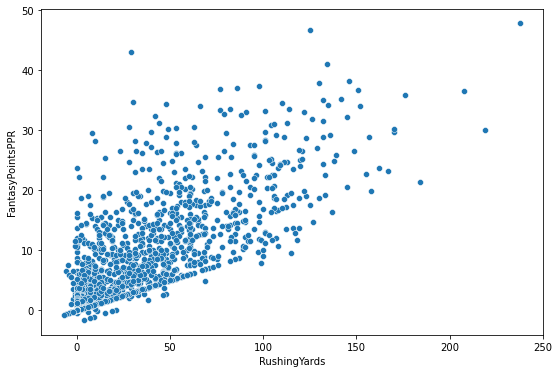

In [9]:
# Plot fantasy point production against rushing yards
plt.figure(figsize = (9,6))
sns.scatterplot(x = running_backs['RushingYards'],
        y = running_backs['FantasyPointsPPR'])
plt.xlabel = ('Mean Rushing Yards')
plt.ylabel = ('Mean Fantasy Points (PPR)')
plt.title = ('Impact of Rushing Yards on Fantasy Point Production')

### Touchdowns

Let's explore the comparative impact that a touchdown has on the performance of a player.

In [10]:
# Create a new column for total touchdowns
TD_sum = data['ReceivingTouchdowns'] + data['RushingTouchdowns'] + data['PassingTouchdowns']
data['TotalTouchdowns'] = TD_sum

# Group the data by player and get the averages
touchdowns = data[['Name', 'TotalTouchdowns', 'FantasyPointsPPR', 'Position']]
touchdowns = touchdowns.groupby(['Name', 'Position']).mean().sort_values(by='TotalTouchdowns', ascending = False)
touchdowns.reset_index(inplace = True)
touchdowns.head(10)

,Name,Position,TotalTouchdowns,FantasyPointsPPR
0,Patrick Mahomes,QB,3.2500,26.06750
1,Matt Ryan,QB,2.4375,22.18500
2,Andrew Luck,QB,2.4375,20.49500
3,Ben Roethlisberger,QB,2.3125,21.36625
4,Drew Brees,QB,2.2500,19.06125
5,Russell Wilson,QB,2.1875,18.71375
6,Jared Goff,QB,2.1250,19.39500
7,Philip Rivers,QB,2.0000,17.81375
8,Tom Brady,QB,1.9375,17.58125
9,Kirk Cousins,QB,1.9375,17.69500


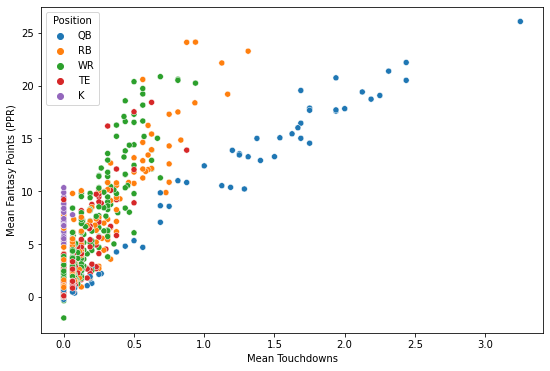

In [11]:
# Plot fantasy point production against total touchdowns
plt.figure(figsize = (9,6))
ax = sns.scatterplot(x = touchdowns['TotalTouchdowns'],
                y = touchdowns['FantasyPointsPPR'],
                    hue = touchdowns['Position'])
ax.set(xlabel = 'Mean Touchdowns', 
       ylabel = 'Mean Fantasy Points (PPR)')
plt.title = ('Impact of Touchdowns on Fantasy Point Production')

From the above chart, we can see that the position most dependent on touchdowns is the quarterback, followed in order by the running back, wide receiver, tight end and finally the kicker.

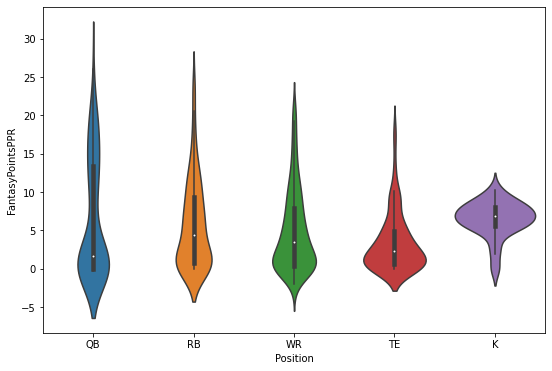

In [12]:
# Let's visualize this same data a little differently using a violin plot

plt.figure(figsize = (9, 6))
ax = sns.violinplot(x = touchdowns['Position'],
                y = touchdowns['FantasyPointsPPR'])

### Work on the trailing average problem

This is going to be a very important problem to solve, as the function will be used to calculate a trailing average for most continuous stats.  Furthermore, I will depend on those rolling averages to assign tier rankings to each player at a given position.  

The following cell will form the basis for a lot of the functions I will be applying to the dataset

In [13]:
def trailing_stats_mean(df, column, window):
    
    """
    Function to create a new column with a trailing aggregate mean
    as a new feature for prediction.
    
    Inputs:
        - df: The dataframe on which the function will be applied
        - Column: The column on which to apply the function
        - Window: The number of past values to consider when apply the function

        
    Output:
        - An aggregate value
        
    """
    # Get all unique players in the DataFrame
    players = df['Name'].unique().tolist()
    
    # Define a DataFrame to hold our values
    df_out = pd.DataFrame()
    # Loop through the unique players
    for player in players:
        # Create a temporary dataframe for each player
        temp_df = df[df['Name'] == player]
        # Calculate the n game trailing average for all players.  Set closed parameter to 'left'
        # so that the current value for fantasy points is not included in the calculation.
        # Backfill the two resulting NaN values
        temp_df[f'TrailingAverage{column}'] = temp_df[column].rolling(window = window,
                                                                     closed = 'left').mean().fillna(method = 'bfill')
        # Append the temporary dataframe to the output
        df_out = df_out.append(temp_df)
    # Return a dataframe with the values sorted by the original index
    return df_out.sort_index()
    
    

In [14]:
# Apply the above function
df_rolling = trailing_stats_mean(data, 'FantasyPointsPPR', 5)
df_rolling.head(15)

,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,...,TwoPointConversionReceptions,FantasyPointsPPR,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,TotalTouchdowns,TrailingAverageFantasyPointsPPR
0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,14,Ryan Fitzpatrick,...,0.0,42.28,0.0,0.0,0.0,0.0,0.0,NaN,5.0,20.088
1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,41,Alvin Kamara,...,0.0,43.10,0.0,0.0,0.0,0.0,0.0,NaN,3.0,28.600
2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,Drew Brees,...,0.0,31.56,0.0,0.0,0.0,0.0,0.0,NaN,3.0,25.204
4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,10,Tyreek Hill,...,0.0,36.30,0.0,0.0,0.0,0.0,0.0,NaN,2.0,18.240
5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,30,James Conner,...,0.0,34.20,0.0,0.0,0.0,0.0,0.0,NaN,2.0,22.420
6,201810129,8244,2018,2018-09-09T16:05:00,1,LAC,KC,HOME,17,Philip Rivers,...,0.0,28.96,0.0,0.0,0.0,0.0,0.0,NaN,3.0,22.360
7,201810129,18890,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,15,Patrick Mahomes,...,0.0,28.34,0.0,0.0,0.0,0.0,0.0,NaN,4.0,26.224
8,201810122,3943,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,11,DeSean Jackson,...,0.0,31.60,0.0,0.0,0.0,0.0,0.0,Questionable,2.0,17.960
10,201810112,2593,2018,2018-09-09T20:20:00,1,GB,CHI,HOME,12,Aaron Rodgers,...,0.0,24.94,0.0,0.0,0.0,0.0,0.0,Probable,3.0,20.916
12,201810108,12831,2018,2018-09-09T13:00:00,1,CLE,PIT,HOME,5,Tyrod Taylor,...,0.0,23.58,0.0,0.0,0.0,0.0,0.0,NaN,2.0,8.196


In [15]:
# # Lay the groundwork for the trailing average function that I will be applying
# # a ton throughout feature engineering

# # make a list of all unique players
# players = data['Name'].unique().tolist()

# # define a new dataframe where we will aggregate the rolling stats
# df_rolling = pd.DataFrame()
# # Loop through all unique players
# for player in players:
#     # Create a temporary dataframe for each player
#     temp_df = data[data['Name'] == player]
#     # Calculate the 3 game trailing average for all players.  Set closed parameter to 'left'
#     # so that the current value for fantasy points is not included in the calculation.
#     # Backfill the two resulting NaN values
#     temp_df['TrailingAverageFPTS'] = temp_df['FantasyPointsPPR'].rolling(window = 3,
#                                                                         closed = 'left').mean().fillna(method = 'bfill')
#     df_rolling = df_rolling.append(temp_df)
# df_rolling.head(15)    

Check the NaN values for the new column that we've created.  Turns out that they are rooking players who don't have enough games under their belt to have a 3 point average.  I will have to figure out the best strategy for dealing with these guys.  I can either drop them or I can impute a median value for their performances.

In [16]:

df_rolling[df_rolling['TrailingAverageFantasyPointsPPR'].isna()].groupby('Name')['Name'].value_counts().head()

Name                     Name                   
Alex Ellis               Alex Ellis                 3
Allen Lazard             Allen Lazard               1
Auden Tate               Auden Tate                 4
Austin Davis             Austin Davis               3
Austin Seferian-Jenkins  Austin Seferian-Jenkins    5
Name: Name, dtype: int64

<br> <br>
### Ranking players by tier
In fantasy football, it is common practice to refer to players by their tier level at a given position.  For example, a running back who is expected to average around 18 points in a given week is considered an RB1.  If a player is expected to get 15 points, we refer to them as an RB2 and so on.  Let's explore this idea to see if it carries any weight for trying to make our predictions.  Rather than assigning a player a permanent value, let's use their rolling fantasy points average to assign a tier.  Could explore using a a larger window for this assignment.

In [17]:
def tier_maker(position, points):
    
    """
    Take in two arguments:
    
     - Position: Column of the dataframe holding the player position
     - Points: Trailing average of fantasy points for a given player
    
    Classify players at every position to a tier based on their recent 
    performance (Trailing average fantasy points). Classifications will work
    as follows.
    
    Running Back:
        -RB1: Trailing average greater than 18pts
        -RB2: Trailing average between 12 and 18 pts
        -RB3: Trailing average between 8 and 12 pts
        -RB4: Trailing average below 8 pts
        
    Wide Receiver:
        -WR1: Trailing average greater than 18pts
        -WR2: Trailing average between 12 and 18 pts
        -WR3: Trailing average between 8 and 12 pts
        -WR4: Trailing average below 8 pts
        
    Tight End:
        -TE1: Trailing average greater than 15pts
        -TE2: Trailing average between 10 and 15 pts
        -TE3: Trailing average below 10 pts
        
    Quarterback:
        -QB1: Trailing average greater than 24pts
        -QB2: Trailing average between 18 and 24pts
        -QB3: Trailing average between 12 and 18pts
        -QB4: Trailing average below 12 pts
    
    Kicker:
        - K1: Trailing average greater than 10 pts
        - K2: Trailing average between 7 and 10 points
        - K3: Trailing average below 7 points
        """

    # Let's make tier assignments for running backs
    if position == 'RB':
        if points > 18:
            return 'RB1'
        elif 12 < points <= 18:
            return 'RB2'
        elif 8 < points <= 12:
            return 'RB3'
        else:
            return 'RB4'
            
    # Let's make tier assignments for wide receivers
    if position == 'WR':
        if points > 18:
            return 'WR1'
        elif 12 < points <= 18:
            return 'WR2'
        elif 8 < points <= 12:
            return 'WR3'
        else:
            return 'WR4'
            
    # Let's make tier assignments for tight ends
    if position == 'TE':
        if points > 15:
            return 'TE1'
        elif 10 < points <= 15:
            return 'TE2'
        else:
            return 'TE3'
    
    # Let's make tier assignments for quarterbacks
    if position == 'QB':
        if points > 24:
            return 'QB1'
        elif 16 < points <= 22:
            return 'QB2'
        elif 10 < points <= 16:
            return 'QB3'
        else:
            return 'QB4'

    # Let's make tier assignments for kickers
    if position == 'K':
        if points > 10:
            return 'K1'
        elif 7 < points <= 10:
            return 'K2'
        else:
            return 'K3'
    
    # If noting is returned before this point, return np.nan
    return np.nan

In [18]:
# Apply the tier_maker_df() function to the dataframe

df_rolling['PlayerTier']= df_rolling.apply(lambda x: tier_maker(x['Position'], x['TrailingAverageFantasyPointsPPR']), axis = 1)

In [19]:
df_rolling

,GameKey,PlayerID,Season,GameDate,Week,Team,Opponent,HomeOrAway,Number,Name,...,FantasyPointsPPR,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,InjuryStatus,TotalTouchdowns,TrailingAverageFantasyPointsPPR,PlayerTier
0,201810122,8283,2018,2018-09-09T13:00:00,1,TB,NO,AWAY,14,Ryan Fitzpatrick,...,42.28,0.0,0.0,0.0,0.0,0.0,NaN,5.0,20.088,QB2
1,201810122,18878,2018,2018-09-09T13:00:00,1,NO,TB,HOME,41,Alvin Kamara,...,43.10,0.0,0.0,0.0,0.0,0.0,NaN,3.0,28.600,RB1
2,201810122,7242,2018,2018-09-09T13:00:00,1,NO,TB,HOME,9,Drew Brees,...,31.56,0.0,0.0,0.0,0.0,0.0,NaN,3.0,25.204,QB1
4,201810129,18082,2018,2018-09-09T16:05:00,1,KC,LAC,AWAY,10,Tyreek Hill,...,36.30,0.0,0.0,0.0,0.0,0.0,NaN,2.0,18.240,WR1
5,201810108,18983,2018,2018-09-09T13:00:00,1,PIT,CLE,AWAY,30,James Conner,...,34.20,0.0,0.0,0.0,0.0,0.0,NaN,2.0,22.420,RB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26835,201811721,19085,2018,2018-12-30T13:00:00,17,NYJ,NE,AWAY,35,De'Angelo Henderson,...,-0.10,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,RB4
26836,201811716,16307,2018,2018-12-30T16:25:00,17,KC,LV,HOME,30,Charcandrick West,...,-0.20,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,RB4
26837,201811721,8358,2018,2018-12-30T13:00:00,17,NE,NYJ,HOME,2,Brian Hoyer,...,-0.30,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-0.040,QB4
26838,201811713,18992,2018,2018-12-30T13:00:00,17,JAX,HOU,AWAY,12,Dede Westbrook,...,2.00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,12.880,WR2


<br>

### Let's Investigate How Well the Tiers Delineate Players 

In [20]:
# Make a list of unique positions
positions = df_rolling['Position'].unique().tolist()

# Create a dataframe summarizing weekly performance by tier
df_tier = df_rolling[['Week','Position','PlayerTier', 'FantasyPointsPPR']].groupby(['Week','Position', 'PlayerTier']).mean().reset_index()
df_tier

,Week,Position,PlayerTier,FantasyPointsPPR
0,1,K,K1,9.666667
1,1,K,K2,8.473684
2,1,K,K3,4.416667
3,1,QB,QB1,22.913333
4,1,QB,QB2,18.093333
...,...,...,...,...
301,17,TE,TE3,2.527885
302,17,WR,WR1,13.055556
303,17,WR,WR2,12.435294
304,17,WR,WR3,10.004615


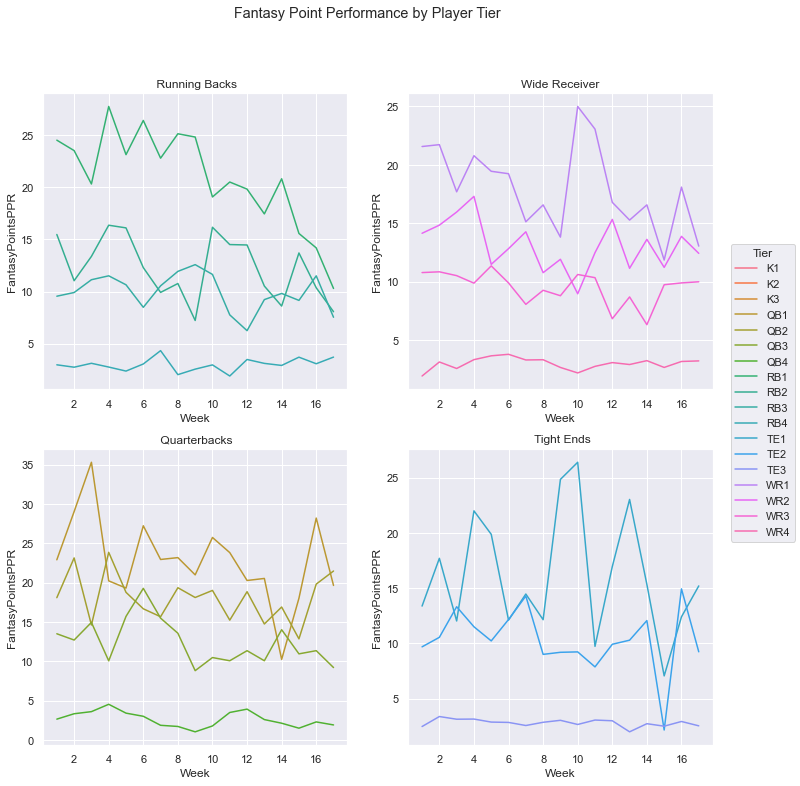

In [21]:
sns.set_theme(style = 'darkgrid')
              
fig, axes = plt.subplots(2, 2, figsize=(12, 12), 
                         sharey=False)
fig.suptitle('Fantasy Point Performance by Player Tier')

# Running Backs
sns.lineplot(ax=axes[0,0], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='RB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)


axes[0,0].set_title(' Running Backs')

# Wide Receiver
sns.lineplot(ax=axes[0,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='WR']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[0,1].set_title('Wide Receiver')


# Quarterbacks
sns.lineplot(ax=axes[1,0], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='QB']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[1,0].set_title(' Quarterbacks')


# Tight Ends
sns.lineplot(ax=axes[1,1], x=df_tier['Week'], 
             y=df_tier[df_tier['Position'] =='TE']['FantasyPointsPPR'],
            hue = df_tier['PlayerTier'],
            legend = False)
axes[1,1].set_title(' Tight Ends')

fig.legend(title = 'Tier', 
           labels = df_tier['PlayerTier'].unique().tolist(),
          loc = 'right')

###  Plot a correlation matrix to see what features are most highly correlated with Fantasy Points 

,GameKey,PlayerID,Season,Week,Number,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnTouchdowns,KickReturns,KickReturnYards,KickReturnTouchdowns,FieldGoalsAttempted,FieldGoalsMade,ExtraPointsMade,TwoPointConversionPasses,TwoPointConversionRuns,TwoPointConversionReceptions,FantasyPointsPPR,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,TotalTouchdowns,TrailingAverageFantasyPointsPPR
GameKey,1.00,0.03,nan,1.00,-0.01,-0.05,-0.03,-0.03,-0.03,-0.01,-0.01,-0.01,-0.03,-0.02,-0.01,-0.02,-0.02,-0.01,-0.02,-0.02,-0.03,-0.00,-0.02,-0.08,-0.07,-0.07,-0.06,-0.04,-0.07,-0.03,-0.02,-0.03,-0.03,-0.01,0.01,0.01,-0.01,-0.03,-0.02,-0.02,-0.01,-0.02,-0.02,-0.08,-0.01,-0.02,-0.02,-0.01,-0.02,-0.05,-0.10
PlayerID,0.03,1.00,nan,0.03,0.12,-0.10,-0.20,-0.21,-0.20,-0.19,-0.14,-0.16,-0.16,-0.09,-0.19,-0.18,-0.13,-0.13,0.05,0.07,0.03,0.04,0.05,0.03,0.03,0.02,0.06,0.01,0.05,-0.03,-0.01,0.04,0.03,-0.00,0.07,0.06,0.00,-0.16,-0.16,-0.16,-0.07,0.01,-0.01,-0.10,0.01,-0.10,-0.13,-0.09,-0.08,-0.10,-0.14
Season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Week,1.00,0.03,nan,1.00,-0.01,-0.05,-0.03,-0.03,-0.03,-0.01,-0.01,-0.01,-0.03,-0.02,-0.01,-0.02,-0.02,-0.01,-0.02,-0.02,-0.03,-0.00,-0.02,-0.08,-0.07,-0.07,-0.06,-0.05,-0.07,-0.03,-0.02,-0.03,-0.03,-0.01,0.01,0.01,-0.01,-0.03,-0.02,-0.02,-0.01,-0.02,-0.02,-0.08,-0.01,-0.02,-0.02,-0.01,-0.02,-0.05,-0.10
Number,-0.01,0.12,nan,-0.01,1.00,0.06,-0.22,-0.22,-0.21,-0.23,-0.18,-0.20,-0.18,-0.14,-0.22,-0.21,-0.19,-0.18,-0.12,-0.11,-0.14,-0.06,-0.13,0.08,0.08,0.07,0.14,0.04,0.10,-0.11,-0.07,-0.07,-0.06,-0.02,-0.06,-0.06,-0.01,-0.21,-0.20,-0.21,-0.05,-0.01,0.01,-0.14,-0.02,-0.14,-0.15,-0.13,-0.10,-0.14,-0.18
Started,-0.05,-0.10,nan,-0.05,0.06,1.00,0.32,0.32,0.32,0.30,0.25,0.28,0.27,0.21,0.30,0.30,0.27,0.26,0.27,0.25,0.19,0.16,0.23,0.46,0.44,0.41,0.32,0.22,0.37,0.19,0.13,-0.00,0.00,0.00,-0.08,-0.08,0.00,-0.16,-0.15,-0.16,0.08,0.03,0.05,0.53,-0.01,-0.10,-0.11,-0.10,-0.08,0.38,0.56
PassingAttempts,-0.03,-0.20,nan,-0.03,-0.22,0.32,1.00,0.99,0.97,0.87,0.67,0.78,0.78,0.66,0.85,0.89,0.78,0.76,0.10,0.09,0.21,0.08,0.16,-0.17,-0.16,-0.14,-0.16,-0.07,-0.15,0.42,0.28,-0.05,-0.03,-0.01,-0.05,-0.04,-0.01,-0.05,-0.05,-0.05,0.29,0.02,-0.01,0.37,-0.00,-0.04,-0.04,-0.03,-0.03,0.58,0.39
PassingCompletions,-0.03,-0.21,nan,-0.03,-0.22,0.32,0.99,1.00,0.98,0.88,0.68,0.78,0.80,0.62,0.87,0.89,0.77,0.74,0.09,0.08,0.21,0.08,0.16,-0.16,-0.15,-0.14,-0.16,-0.07,-0.15,0.42,0.27,-0.05,-0.03,-0.01,-0.05,-0.04,-0.01,-0.05,-0.05,-0.05,0.29,0.02,-0.01,0.38,-0.00,-0.03,-0.04,-0.03,-0.03,0.60,0.40
PassingYards,-0.03,-0.20,nan,-0.03,-0.21,0.32,0.97,0.98,1.00,0.87,0.71,0.81,0.85,0.61,0.89,0.93,0.74,0.72,0.10,0.08,0.20,0.08,0.16,-0.16,-0.15,-0.14,-0.16,-0.07,-0.15,0.40,0.25,-0.05,-0.03,-0.01,-0.05,-0.04,-0.01,-0.05,-0.05,-0.05,0.30,0.02,-0.01,0.40,-0.00,-0.03,-0.04,-0.03,-0.02,0.64,0.40
PassingCompletionPercentage,-0.01,-0.19,nan,-0.01,-0.23,0.30,0.87,0.88,0.87,1.00,0.86,0.91,0.75,0.54,0.97,0.88,0.72,0.69,0.10,0.09,0.21,0.07,0.16,-0.15,-0.14,-0.12,-0.16,-0.07,-0.14,0.39,0.23,-0.04,-0.03,-0.01,-0.04,-0.04,-0.01,-0.05,-0.05,-0.05,0.24,0.01,-0.01,0.35,-0.01,-0.04,-0.04,-0.03,-0.03,0.56,0.37


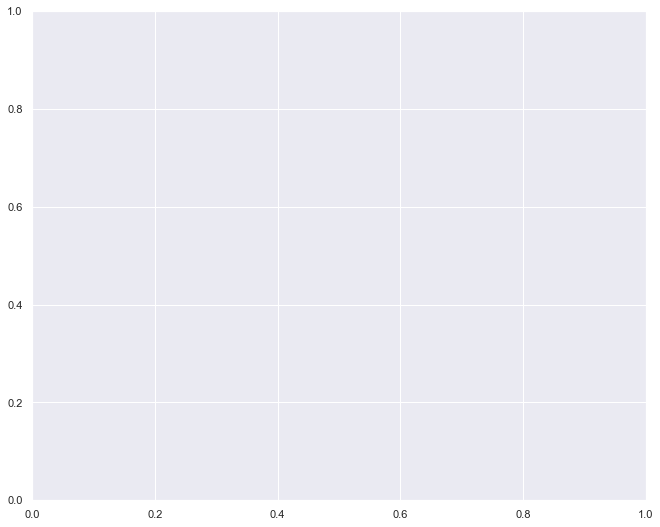

In [29]:
corr = df_rolling.corr()
corr.style.background_gradient(cmap = 'seismic').set_precision(2)